**1) Extract reviews of any product from ecommerce website like amazon**

**2) Perform emotion mining**


In [37]:
import nltk
import requests
from tqdm import tqdm_notebook
import numpy as np
import pandas as pd
from bs4 import BeautifulSoup as bs
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as pe
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
import re
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from wordcloud import WordCloud,STOPWORDS
from textblob import TextBlob

import warnings

warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (16,4)
plt.rcParams['figure.dpi'] = 350
sns.set_style(style='darkgrid')
plt.tight_layout()
%matplotlib inline

<Figure size 5600x1400 with 0 Axes>

Performing Web Scraping

Adding Header And Funtion

In [38]:
headers = { 'authority': 'www.amazon.in',
            'accept-language': 'en-US,en;q=0.9',
            'referer': 'https://www.amazon.in/boAt-Xtend-Pro-Dedicated-Bluetooth/dp/B0B574QXFL/ref=sr_1_3?adgrpid=66314740727&ext_vrnc=hi&gclid=CjwKCAiAheacBhB8EiwAItVO27OqojMgIrqr8l4RkhJXVEgEYEy5H4Hv_ggVfrdU-8RF6WYv_aDItRoCKvwQAvD_BwE&hvadid=398059830400&hvdev=c&hvlocphy=1007768&hvnetw=g&hvqmt=b&hvrand=1335892987492695214&hvtargid=kwd-1434352673191&hydadcr=24569_1971431&keywords=boat+xtend+pro&qid=1671035479&sr=8-3',
            'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/102.0.0.0 Safari/537.36'}

In [39]:
def get_soup(url):
    r = requests.get(url, headers=headers,
    params={'url': url, 'wait': 2})
    soup = bs(r.text, 'html.parser')
    return soup



In [40]:
reviewlist = []

def get_reviews(soup):
    reviews = soup.find_all('div', {'data-hook': 'review'})
    try:
        for item in reviews:
            review = {  'Title': item.find('a', {'data-hook': 'review-title'}).text.strip(),
                        'Rating':float(item.find('i', {'data-hook': 'review-star-rating'}).text.replace('out of 5 stars', '').strip()),
                        'Review':item.find('span', {'data-hook': 'review-body'}).text.strip(),
                        'Review_Date':item.find('span', {'data-hook': 'review-date'}).text.replace('Reviewed in India 🇮🇳 on', 'Reviewed in India on').strip()}
            reviewlist.append(review)
    except:
        pass

**Looping In URL**

In [41]:
for x in tqdm_notebook(range(160)):
    soup = get_soup(f'https://www.amazon.in/Redgear-Cloak-Gaming-Headphones-Microphone/product-reviews/B07T9FV9YP/ref=cm_cr_getr_d_paging_btm_next_22?ie=UTF8&reviewerType=all_reviews&pageNumber={x}')
    get_reviews(soup)
    if not soup.find('li', {'class': 'a-disabled a-last'}):
        pass
    else:
        break

  0%|          | 0/160 [00:00<?, ?it/s]

**Creating Dataframe With Reviewlist**

In [42]:
rg = pd.DataFrame(reviewlist)

rg


,Title,Rating,Review,Review_Date
0,A value for money product best in segment,4.0,Rich qualityGood soundBest RGB in segmentConsL...,Reviewed in India on 29 April 2023
1,Veey good headphones,4.0,Very good headphones but when you wear it for ...,Reviewed in India on 24 April 2023
2,Decent Headphone,4.0,Decent headphone for the priceLittle heavy on ...,Reviewed in India on 28 April 2023
3,Value for money,4.0,"Good for gaming, and average for music and mov...",Reviewed in India on 25 April 2023
4,Good,4.0,The sound quality is good and the build qualit...,Reviewed in India on 20 April 2023
...,...,...,...,...
1595,Gaming purpose ke liye aacha hain,5.0,Gaming 👍👍👍 volume control 👍👍👍Noise cancelling ...,Reviewed in India on 8 August 2021
1596,Headphone overall review,5.0,Overall good for gaming and worth for the mone...,Reviewed in India on 3 April 2021
1597,Its a very good gaming headphone,5.0,I love this because it dont let any sound from...,Reviewed in India on 17 June 2021
1598,Fabulous,5.0,Awesome,Reviewed in India on 23 January 2022


In [43]:
rg["Review_Date"] = rg["Review_Date"].replace('Reviewed in India on','', regex=True)
rg['Review_Date'] = pd.to_datetime(rg['Review_Date'])

rg

,Title,Rating,Review,Review_Date
0,A value for money product best in segment,4.0,Rich qualityGood soundBest RGB in segmentConsL...,2023-04-29
1,Veey good headphones,4.0,Very good headphones but when you wear it for ...,2023-04-24
2,Decent Headphone,4.0,Decent headphone for the priceLittle heavy on ...,2023-04-28
3,Value for money,4.0,"Good for gaming, and average for music and mov...",2023-04-25
4,Good,4.0,The sound quality is good and the build qualit...,2023-04-20
...,...,...,...,...
1595,Gaming purpose ke liye aacha hain,5.0,Gaming 👍👍👍 volume control 👍👍👍Noise cancelling ...,2021-08-08
1596,Headphone overall review,5.0,Overall good for gaming and worth for the mone...,2021-04-03
1597,Its a very good gaming headphone,5.0,I love this because it dont let any sound from...,2021-06-17
1598,Fabulous,5.0,Awesome,2022-01-23


**Performing EDA In Dataset**

**Visualizing The Data**

In [44]:
ts = rg[['Rating','Review_Date']]
ts.set_index('Review_Date', inplace=True)

ts.head()

,Rating
Review_Date,
2023-04-29,4.0
2023-04-24,4.0
2023-04-28,4.0
2023-04-25,4.0
2023-04-20,4.0


<Axes: ylabel='Rating'>

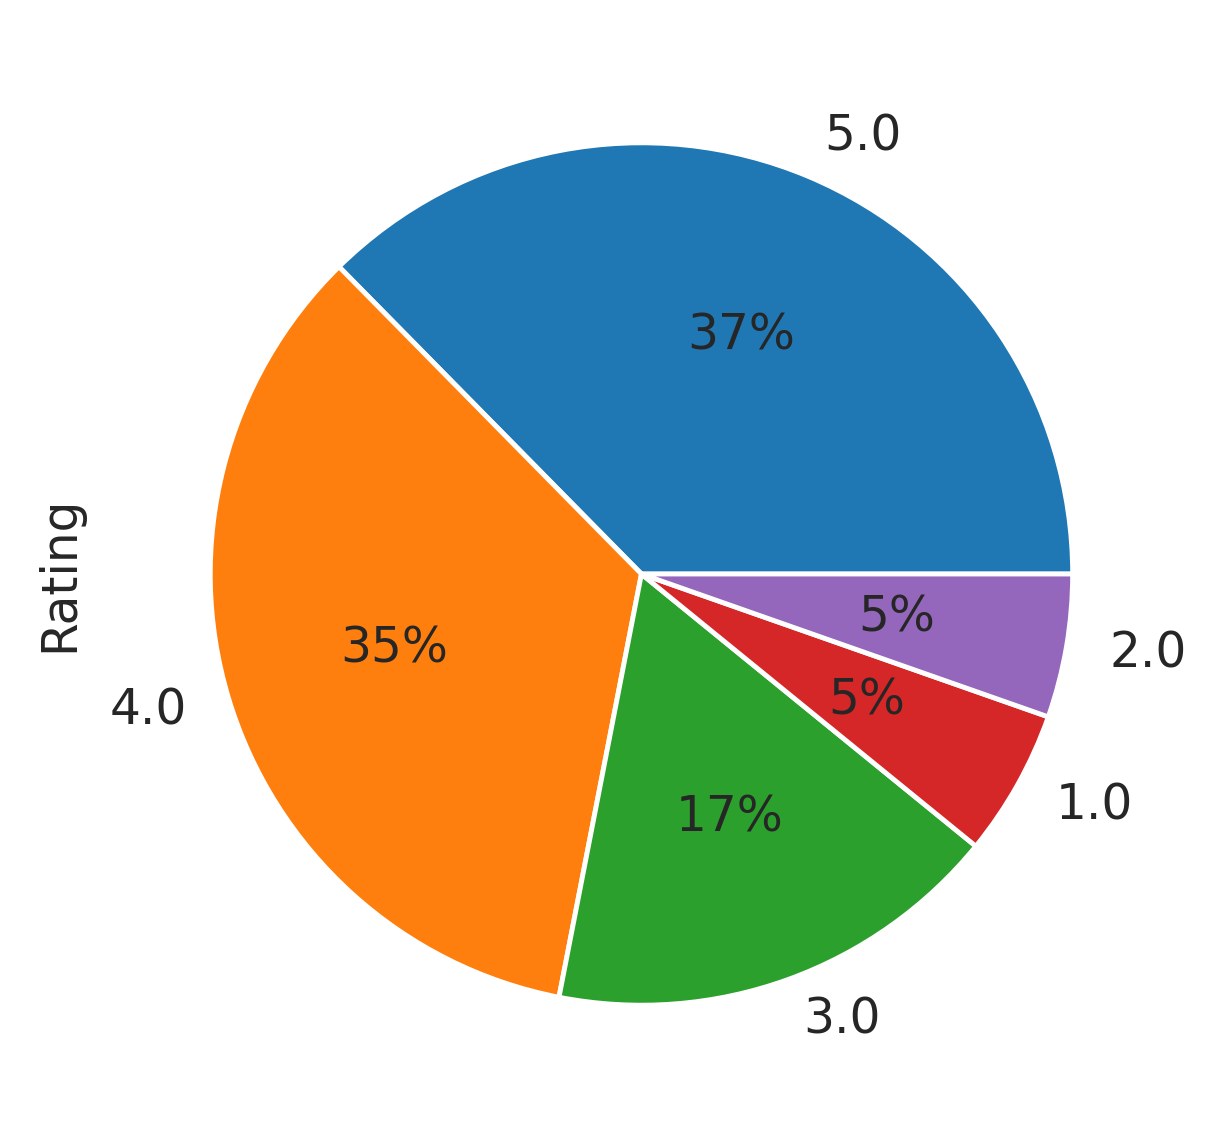

In [46]:
ts['Rating'].value_counts().plot(kind='pie',autopct='%1.00f%%')

<Axes: xlabel='Review_Date'>

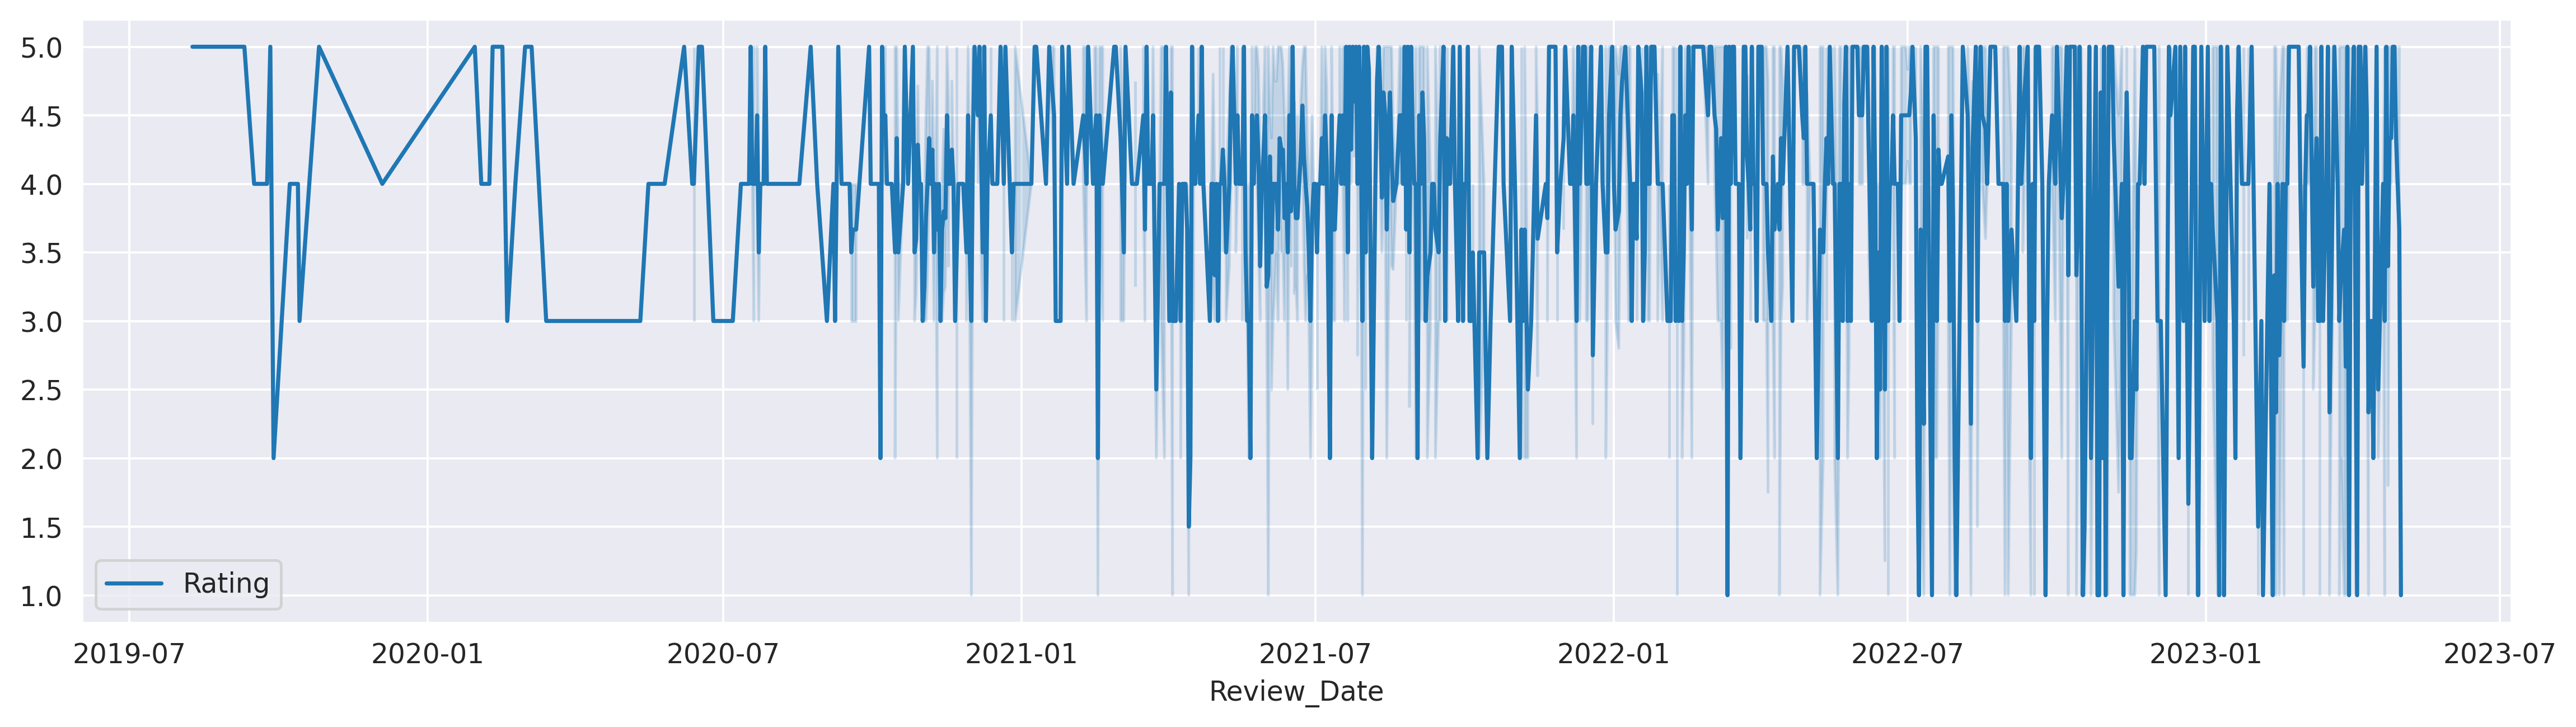

In [47]:
sns.lineplot(data= ts)

**Applying Lemmatization And Removing Stopword**

In [48]:
def corpu(em, Text):
    lemma = WordNetLemmatizer()

    corpus = []

    for i in range(len(em)):
        msg = re.sub('[^a-zA-Z]',' ',em[Text][i])
        msg = msg.lower()
        msg = msg.split()
    
        msg = [lemma.lemmatize(i) for i in msg if i not in stopwords.words('english')]
        msg = ' '.join(msg)
        corpus.append(msg)

    return corpus

In [49]:
corpus = corpu(rg, 'Review')

corpus

['rich qualitygood soundbest rgb segmentconslenth macro usb cable rgb increased',
 'good headphone wear long period u start sweat good quality using since',
 'decent headphone pricelittle heavy ear job',
 'good gaming average music moviesbut price ok',
 'sound quality good build quality good much long wire big much get much sweat',
 'review month extensive use purchased casual use even though marketed towards gaming audience pro con pro attractive rgb touch subtle scratch audio quality decent hard find price range wired headset audio latency better compared wireless one durable look cheap even though con volume low use audio amplifier software boost sound sound even audible headphone guess intensity problem',
 'padding soft hurt earsotherwise best headphone',
 'good gaming decent listening music bass good good weight g little heavy ok awesome headphone price headphone beat price range',
 'using headset honest review headset good look gaming purpose going watch movie listening music lit

**Performing Word Tokenize**

In [50]:
def word_tok(corpus):
    word = []

    for i in corpus:
        words = word_tokenize(i)
        word.append(words)

    return word

In [51]:
word = word_tok(corpus)

word

[['rich',
  'qualitygood',
  'soundbest',
  'rgb',
  'segmentconslenth',
  'macro',
  'usb',
  'cable',
  'rgb',
  'increased'],
 ['good',
  'headphone',
  'wear',
  'long',
  'period',
  'u',
  'start',
  'sweat',
  'good',
  'quality',
  'using',
  'since'],
 ['decent', 'headphone', 'pricelittle', 'heavy', 'ear', 'job'],
 ['good', 'gaming', 'average', 'music', 'moviesbut', 'price', 'ok'],
 ['sound',
  'quality',
  'good',
  'build',
  'quality',
  'good',
  'much',
  'long',
  'wire',
  'big',
  'much',
  'get',
  'much',
  'sweat'],
 ['review',
  'month',
  'extensive',
  'use',
  'purchased',
  'casual',
  'use',
  'even',
  'though',
  'marketed',
  'towards',
  'gaming',
  'audience',
  'pro',
  'con',
  'pro',
  'attractive',
  'rgb',
  'touch',
  'subtle',
  'scratch',
  'audio',
  'quality',
  'decent',
  'hard',
  'find',
  'price',
  'range',
  'wired',
  'headset',
  'audio',
  'latency',
  'better',
  'compared',
  'wireless',
  'one',
  'durable',
  'look',
  'cheap',
  '

**Creating Word Cloud**

In [52]:
def worldcloud(data):
    txt = ' '.join(data)
    stop = STOPWORDS
    
    wc = WordCloud(background_color='white',stopwords=stop).generate(txt)
    plt.imshow(wc)
    plt.axis('off')
    plt.title('worldcloud',size = 50)

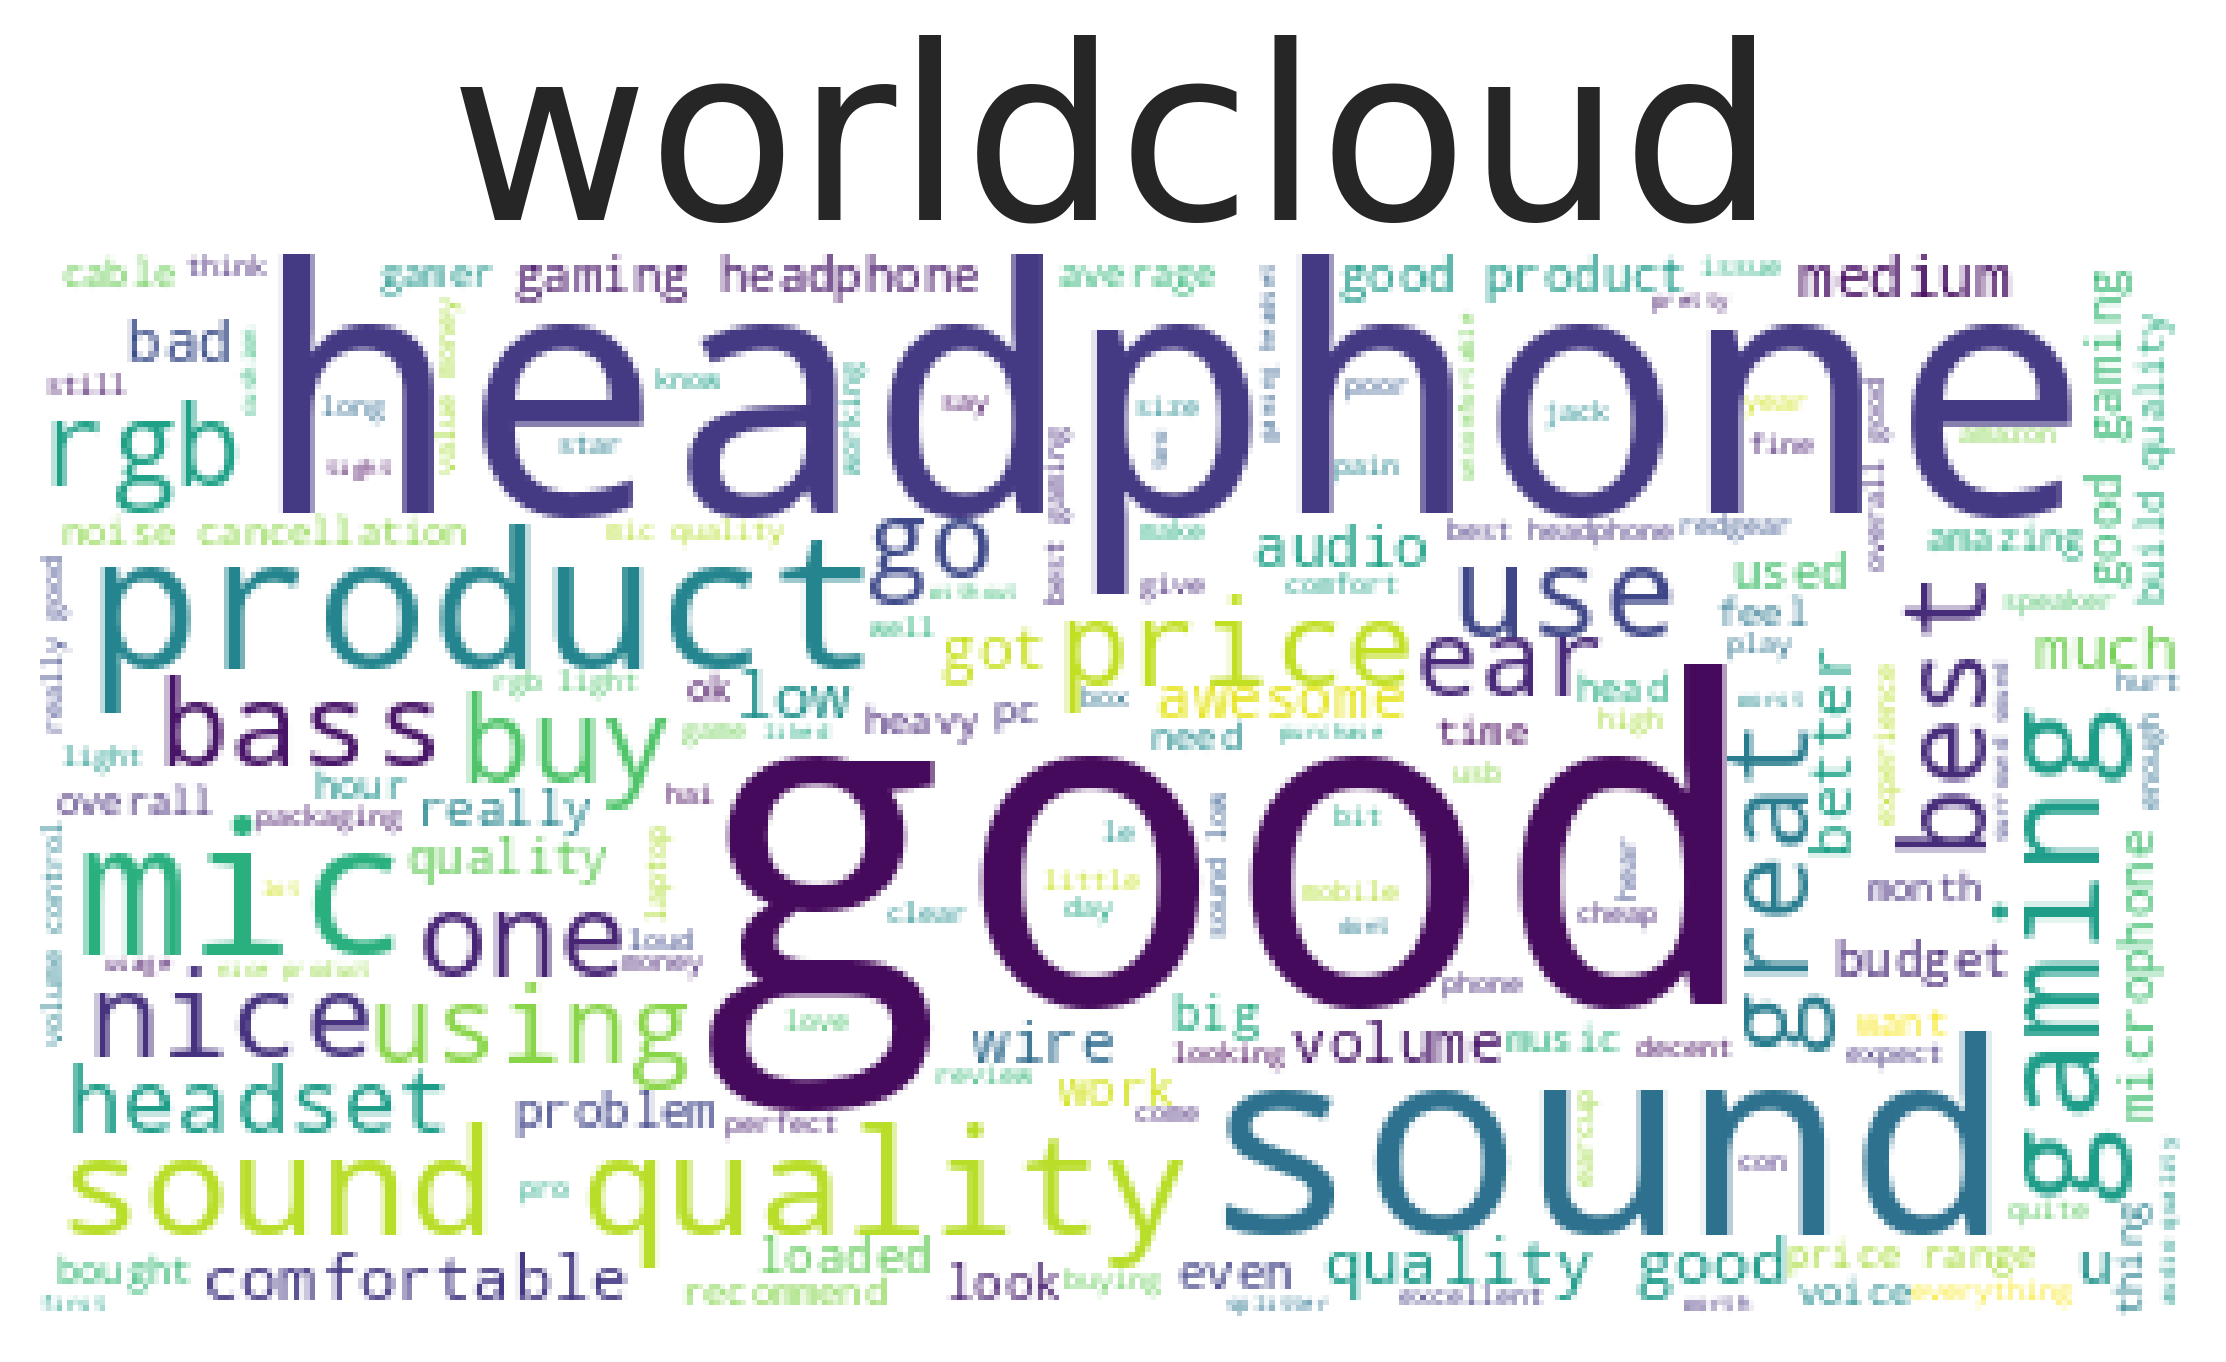

In [53]:
worldcloud(corpus)

**Performing Data Preprocesing**

**Creating Bag Of Word's**

In [54]:
cv = CountVectorizer()

x = cv.fit_transform(corpus)
x.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [55]:
cv.get_feature_names_out()

array(['aa', 'aacha', 'aachi', ..., 'zeroed', 'zoom', 'zyada'],
      dtype=object)

In [56]:
bow = pd.DataFrame(x.toarray(), columns=cv.get_feature_names_out())

bow

,aa,aacha,aachi,aap,aapko,aati,aawaj,ability,able,absence,...,youtubers,yr,yup,zabardust,zeb,zebronics,zero,zeroed,zoom,zyada
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1595,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1596,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1597,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1598,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**Creating Tf-Idf**

In [57]:
tf = TfidfVectorizer()

x_tf = tf.fit_transform(corpus)

x_tf.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [58]:
tf.get_feature_names_out()

array(['aa', 'aacha', 'aachi', ..., 'zeroed', 'zoom', 'zyada'],
      dtype=object)

In [59]:
tf_idf = pd.DataFrame(x_tf.toarray(), columns=tf.get_feature_names_out())

tf_idf

,aa,aacha,aachi,aap,aapko,aati,aawaj,ability,able,absence,...,youtubers,yr,yup,zabardust,zeb,zebronics,zero,zeroed,zoom,zyada
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1595,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1596,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1597,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1598,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**Perform Sentimental Analysis**

In [60]:
df_corpus = pd.DataFrame(corpus, columns= ['txt'])

df_corpus

,txt
0,rich qualitygood soundbest rgb segmentconslent...
1,good headphone wear long period u start sweat ...
2,decent headphone pricelittle heavy ear job
3,good gaming average music moviesbut price ok
4,sound quality good build quality good much lon...
...,...
1595,gaming volume control noise cancelling least p...
1596,overall good gaming worth money problem wire t...
1597,love dont let sound outside
1598,awesome


In [61]:
df_corpus['sentiment']=df_corpus['txt'].apply(lambda x : TextBlob(x).sentiment.polarity)

df_corpus

,txt,sentiment
0,rich qualitygood soundbest rgb segmentconslent...,0.375000
1,good headphone wear long period u start sweat ...,0.450000
2,decent headphone pricelittle heavy ear job,-0.016667
3,good gaming average music moviesbut price ok,0.350000
4,sound quality good build quality good much lon...,0.307143
...,...,...
1595,gaming volume control noise cancelling least p...,-0.300000
1596,overall good gaming worth money problem wire t...,0.333333
1597,love dont let sound outside,0.300000
1598,awesome,1.000000


**Sorting Review Into Negtive Or Positive**

In [62]:
def assign_Result(ratings):
    if ratings < 0:
        result = 'negative'
    elif ratings >= 0:
        result = 'positive'

    return result

In [63]:
df_corpus['review_segment']=df_corpus['sentiment'].apply(assign_Result)

df_corpus

,txt,sentiment,review_segment
0,rich qualitygood soundbest rgb segmentconslent...,0.375000,positive
1,good headphone wear long period u start sweat ...,0.450000,positive
2,decent headphone pricelittle heavy ear job,-0.016667,negative
3,good gaming average music moviesbut price ok,0.350000,positive
4,sound quality good build quality good much lon...,0.307143,positive
...,...,...,...
1595,gaming volume control noise cancelling least p...,-0.300000,negative
1596,overall good gaming worth money problem wire t...,0.333333,positive
1597,love dont let sound outside,0.300000,positive
1598,awesome,1.000000,positive


**visualizing The Results**

<Axes: ylabel='review_segment'>

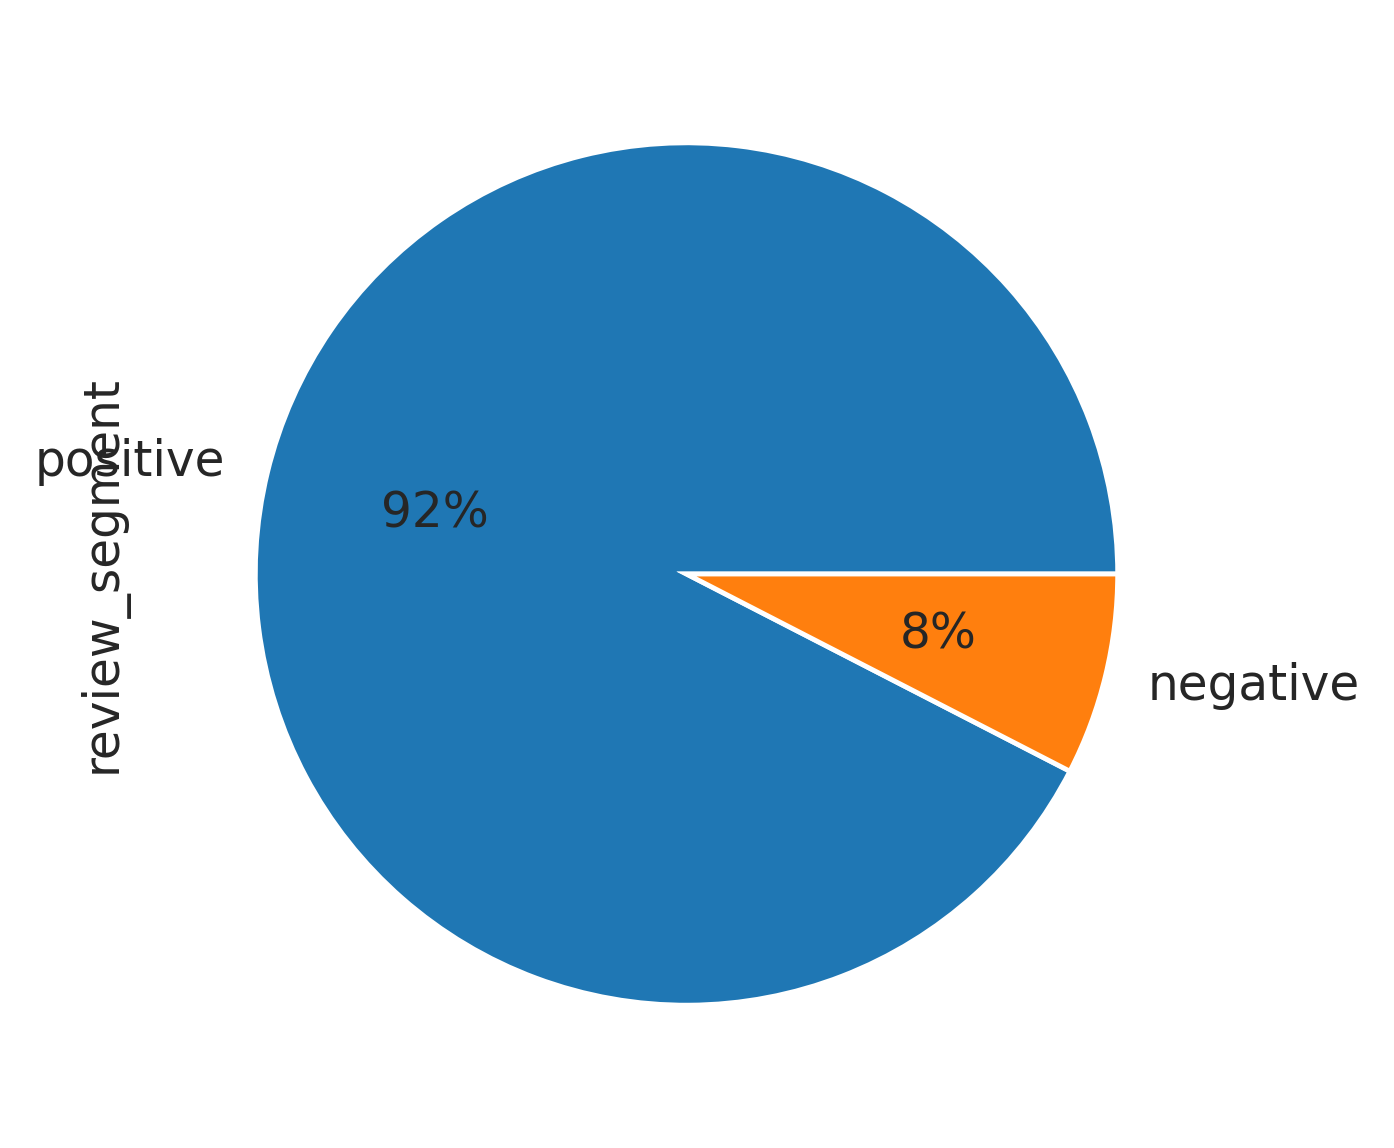

In [65]:
df_corpus['review_segment'].value_counts().plot(kind='pie',autopct='%1.00f%%')